In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Path
path =r'/Users/heathervisentin/Desktop/07-2020 Instacart Basket Analysis'

In [6]:
# Importing Data: customers 
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest3.pkl'))

In [5]:
df.shape

(30964564, 39)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,dependents,fam_status,income,Region,activity,department,age_group,income_group,dependent_group,customer_profile,parent_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Regular Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent


In [8]:
df['price_range_loc'].value_counts(dropna = False)

NaN                   20164567
Low-range product      9674840
Mid-range product       727204
High-range product      397953
Name: price_range_loc, dtype: int64

In [10]:
df['price_range_loc'].isnull()

0           False
1           False
2           False
3           False
4           False
            ...  
30964559     True
30964560     True
30964561     True
30964562     True
30964563     True
Name: price_range_loc, Length: 30964564, dtype: bool

In [11]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,dependents,fam_status,income,Region,activity,department,age_group,income_group,dependent_group,customer_profile,parent_profile
30964559,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,18,10,6.1,both,Regularly busy,NaN,Regular Days,Most Orders,28,Regular customer,7.692105,Low Spender,11.0,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,high activity customer,bulk,Older Age,Above Average Income,Dependents,Older Parent,Older Parent
30964560,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,18,10,6.1,both,Busiest day,NaN,Busiest Days,Most Orders,28,Regular customer,7.692105,Low Spender,11.0,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,high activity customer,bulk,Older Age,Above Average Income,Dependents,Older Parent,Older Parent
30964561,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,18,10,6.1,both,Regularly busy,NaN,Regular Days,Most Orders,28,Regular customer,7.692105,Low Spender,11.0,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,high activity customer,bulk,Older Age,Above Average Income,Dependents,Older Parent,Older Parent
30964562,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,18,10,6.1,both,Regularly busy,NaN,Regular Days,Average Orders,28,Regular customer,7.692105,Low Spender,11.0,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,high activity customer,bulk,Older Age,Above Average Income,Dependents,Older Parent,Older Parent
30964563,1565024,152886,2,1,9,30.0,1000,3,0,Apricots,18,10,12.9,both,Regularly busy,NaN,Busiest Days,Most Orders,13,Regular customer,6.811111,Low Spender,30.0,Non-frequent customer,Male,Pennsylvania,45,7/9/2017,1,married,41662,Northeast,high activity customer,bulk,Middle Age,Below Average Income,Dependents,Middle Aged Parent,Middle Aged Parent


In [12]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [13]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [14]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [15]:
df['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [16]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'newest4.pkl'))

In [17]:
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest4.pkl'))

In [18]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,dependents,fam_status,income,Region,activity,department,age_group,income_group,dependent_group,customer_profile,parent_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Regular Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents,Younger Parent,Younger Parent


In [20]:
df['busiest_day'].value_counts(dropna = False)

Regularly busy    21430960
Busiest day        5908610
Least busy         3624994
Name: busiest_day, dtype: int64

In [21]:
df['busiest_days'].value_counts(dropna = False)

Regular Days    12349739
Busiest Days    11320296
Slowest Days     7294529
Name: busiest_days, dtype: int64

In [22]:
df['busiest_period_of_day'].value_counts(dropna = False)

Most Orders       20180856
Average Orders     9550810
Fewest Orders      1232898
Name: busiest_period_of_day, dtype: int64

In [23]:
df['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [24]:
df['spending_flag'].value_counts(dropna = False)

Low Spender     30361139
High Spender      603425
Name: spending_flag, dtype: int64

In [25]:
df['frequency_flag'].value_counts(dropna = False)

Frequent customer        22208894
Regular customer          6568253
Non-frequent customer     2187417
Name: frequency_flag, dtype: int64

In [32]:
df['age_group'].value_counts(dropna = False)

Middle Age    11651255
Older Age     10574504
Young Age      8738805
Name: age_group, dtype: int64

In [33]:
df['dependent_group'].value_counts(dropna = False)

Dependents       23224883
No Dependents     7739681
Name: dependent_group, dtype: int64

In [34]:
df['busiest_day'].value_counts(dropna = False)

Regularly busy    21430960
Busiest day        5908610
Least busy         3624994
Name: busiest_day, dtype: int64

In [36]:
df['orders_day_of_week'].value_counts(dropna = False)

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

In [37]:
df['order_hour_of_day'].value_counts(dropna = False)

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: order_hour_of_day, dtype: int64

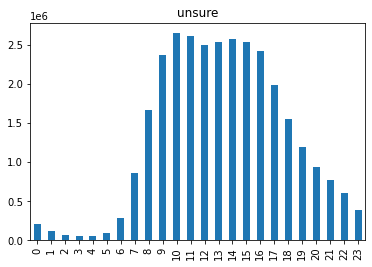

In [38]:
bar_hod_freq = df['order_hour_of_day'].value_counts().sort_index().plot.bar(title = 'unsure')

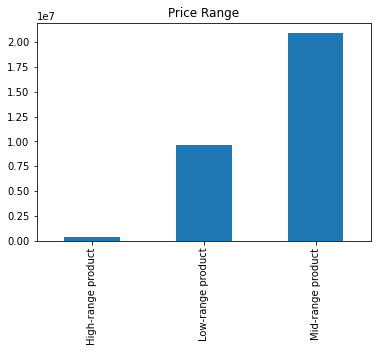

In [40]:
bar_ = df['price_range_loc'].value_counts().sort_index().plot.bar(title = 'Price Range')

In [41]:
bar_.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [48]:
# grouping for stacked bar graph
loyalty_depts = df.groupby(['department', 'loyalty_flag']).size().unstack(fill_value=0)

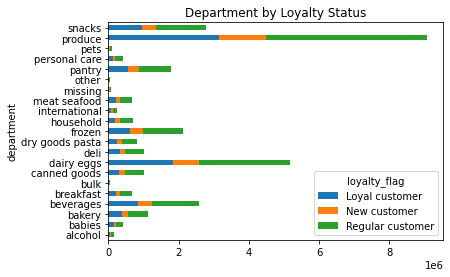

In [64]:
stacked_loyalty_dept = loyalty_depts.plot.barh(stacked = True, title = 'Department by Loyalty Status')

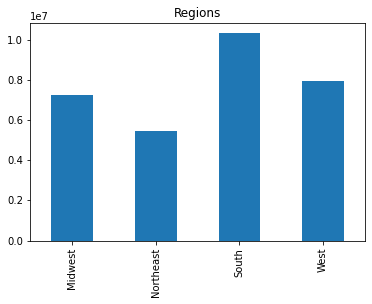

In [53]:
bar_region = df['Region'].value_counts().sort_index().plot.bar(title = 'Regions')

In [54]:
# grouping for stacked bar graph
fam_status_depts = df.groupby(['department', 'fam_status']).size().unstack(fill_value=0)

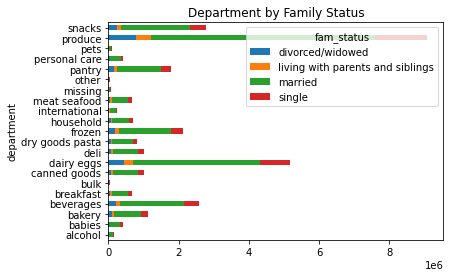

In [55]:
stacked_fam_dept = fam_status_depts.plot.barh(stacked = True, title = 'Department by Family Status')

In [56]:
age_group_depts = df.groupby(['department', 'age_group']).size().unstack(fill_value=0)

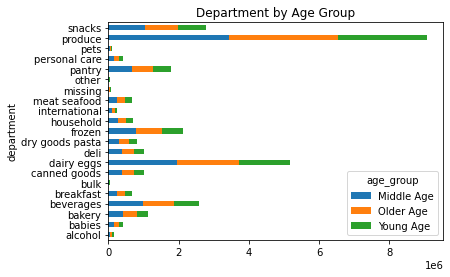

In [57]:
stacked_age_dept = age_group_depts.plot.barh(stacked = True, title = 'Department by Age Group')

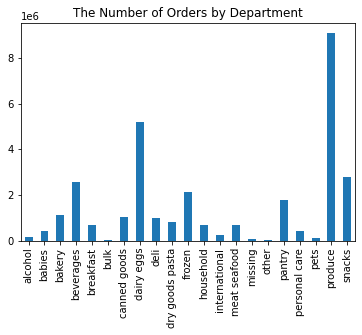

In [59]:
bar_departments = df['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

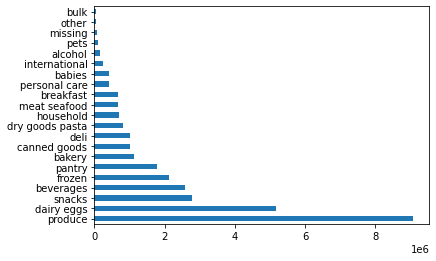

In [62]:
bar_departments = df['department'].value_counts().plot.barh()

In [66]:
region_depts = df.groupby(['department', 'Region']).size().unstack(fill_value=0)

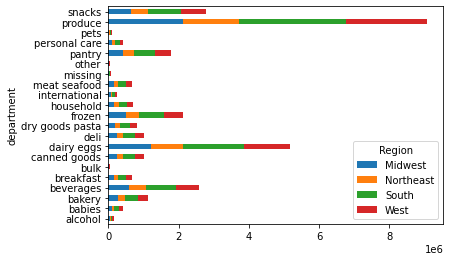

In [68]:
stacked_region_dept = region_depts.plot.barh(stacked = True)

In [74]:
df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [75]:
parent_depts = df.groupby(['department', 'parent_profile']).size().unstack(fill_value=0)

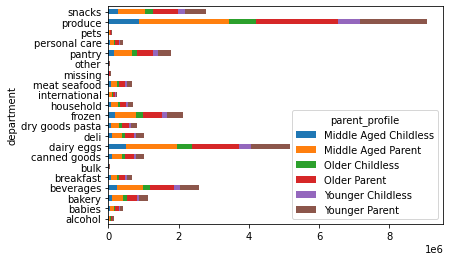

In [76]:
stacked_parent_dept = parent_depts.plot.barh(stacked = True)

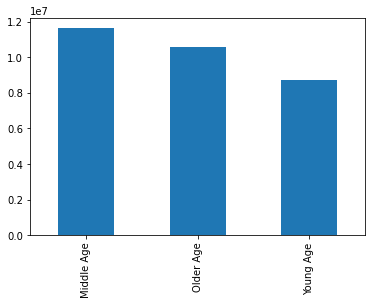

In [84]:
bar_pp= df['age_group'].value_counts().plot.bar()

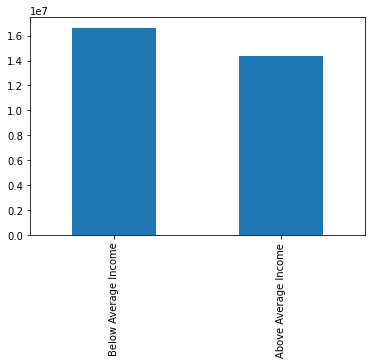

In [85]:
bar_pp= df['income_group'].value_counts().plot.bar()

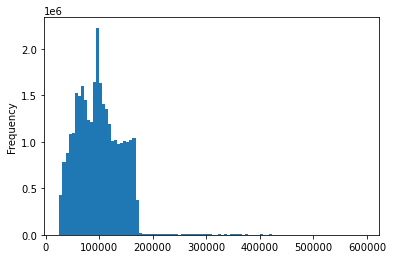

In [87]:
hist_2 = df['income'].plot.hist(bins = 100)

In [88]:
df['income'].value_counts(dropna = False)

72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
52741        5
48493        5
33040        5
91717        5
147660       2
Name: income, Length: 96069, dtype: int64

In [89]:
df['income'].mean()

99675.86510754681

In [92]:
income_depts = df.groupby(['department', 'income_group']).size().unstack(fill_value=0)

<AxesSubplot:ylabel='department'>

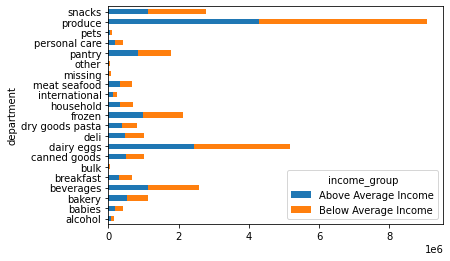

In [93]:
income_depts.plot.barh(stacked = True)

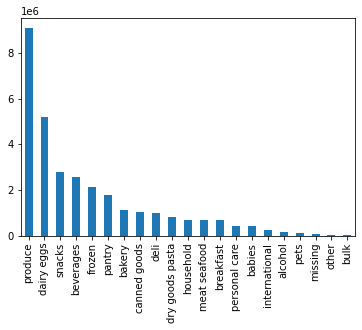

In [11]:
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_vert.png'))

In [13]:
df['Region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: Region, dtype: int64

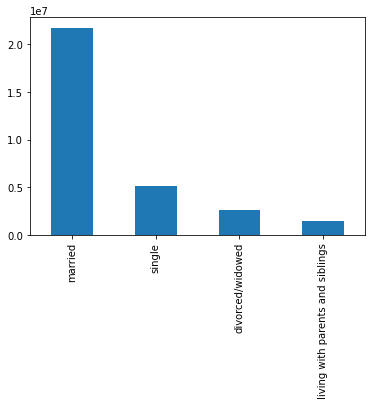

In [14]:
bar_fam_status = df['fam_status'].value_counts().plot.bar()

In [15]:
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam status.png'))

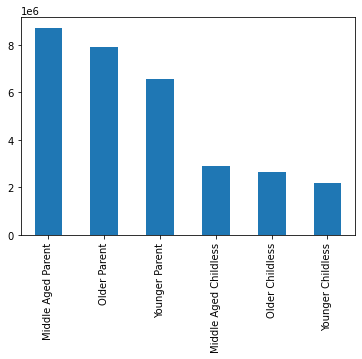

In [16]:
bar_pp = df['parent_profile'].value_counts().plot.bar()

In [17]:
bar_pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam status.png'))

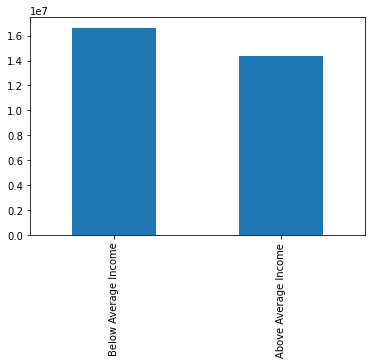

In [19]:
bar_income = df['income_group'].value_counts().plot.bar()

In [20]:
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))